<a href="https://colab.research.google.com/github/Eunchong1276/Financial-Analysis/blob/main/Financial_Data_Analysis_PJT02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **금융 데이터 사기거래 분석**

* 데이터 명세 ⬇

|Column|Description|
|:---|:---|
|step|1step이 1시간인 시간 단위|
|type|온라인 거래유형|
|amount|거래 금액|
|nameOrig|거래 시작 고객|
|oldbalanceOrg|거래 전 잔액|
|newbalanceOrig|거래 후 잔액|
|nameDest|거래 수신 고객|
|oldbalanceDest|거래 전 수취인의 초기 잔액|
|newbalanceDest|거래 후 받는 사람의 새 잔액|
|isFraud|사기 거래|
|isFlaggedFraud|의심사기거래|


In [13]:
# Warnings 제거
import warnings
warnings.filterwarnings('ignore')

# Google Drive Mount
from google.colab import drive
drive.mount('/content/drive')

# 경로  설정
import os
os.chdir('/content/drive/MyDrive/ByteDegree')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [15]:
import pandas as pd
df = pd.read_csv('example_2.csv')
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


## **데이터 Info Check**

In [14]:
# 모듈 Import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
# Data Shape 출력
print(df.shape)

(6362620, 11)


In [17]:
# Data Type 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [18]:
# Null 값 확인
print(df.isnull().sum())

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64


## **EDA**

In [19]:
# 전체 사기율(%) 계산 : 클래스 불균형이 심각한 상태
isFraud_count = df[df['isFraud'] == 1].shape[0]
total_count = df.shape[0]

isFraud_ratio = isFraud_count / total_count * 100

print(f"Total Fraud Rate : {isFraud_ratio}% ")

Total Fraud Rate : 0.12908204481801522% 


In [20]:
# Type 별 사기율(%)
total_count_by_type = df.groupby('type').size()
fraud_count_by_type = df[df['isFraud'] == 1].groupby('type').size()

fraud_ratio_by_type = (fraud_count_by_type / total_count_by_type) * 100

print(fraud_ratio_by_type)

type
CASH_IN          NaN
CASH_OUT    0.183955
DEBIT            NaN
PAYMENT          NaN
TRANSFER    0.768799
dtype: float64


In [21]:
# 사기거래 여부에 따른 amount의 분포

# isFraud가 1인 샘플 1000개 추출
fraud_samples = df[df['isFraud'] == 1].sample(n=1000, random_state = 42)

# isFraud가 0인 샘플 1000개 추출
non_fraud_samples = df[df['isFraud'] == 0].sample(n = 1000, random_state = 42)


In [22]:
print(fraud_samples['amount'].max())
print(fraud_samples['amount'].min())
print(fraud_samples['amount'].describe())

10000000.0
0.0
count    1.000000e+03
mean     1.500081e+06
std      2.367939e+06
min      0.000000e+00
25%      1.438683e+05
50%      4.876534e+05
75%      1.582579e+06
max      1.000000e+07
Name: amount, dtype: float64


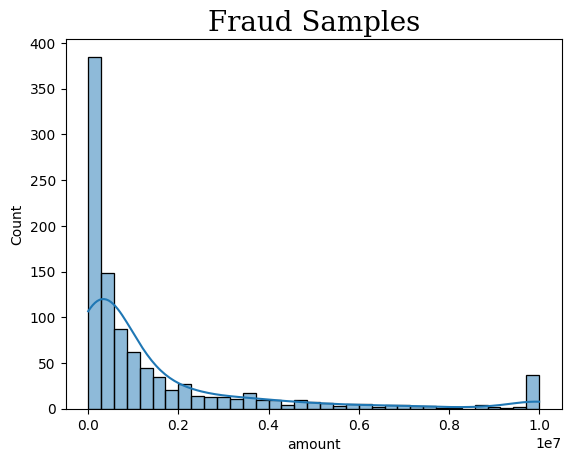

In [23]:
# 사기거래인 샘플 분포 시각화(kde)
sns.histplot(x = 'amount', data = fraud_samples, kde = True)
plt.title('Fraud Samples', fontfamily='serif', fontsize=20)
plt.show()

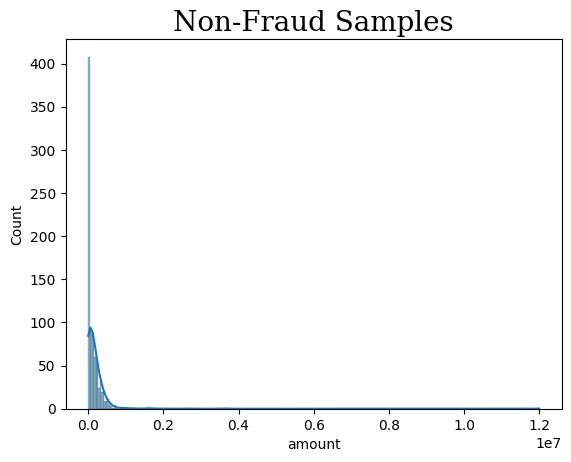

In [24]:
# 사기거래가 아닌 샘플 분포 시각화(kde)
sns.histplot(x='amount',data = non_fraud_samples, kde = True)
plt.title('Non-Fraud Samples', fontfamily = 'serif', fontsize = 20)
plt.show()

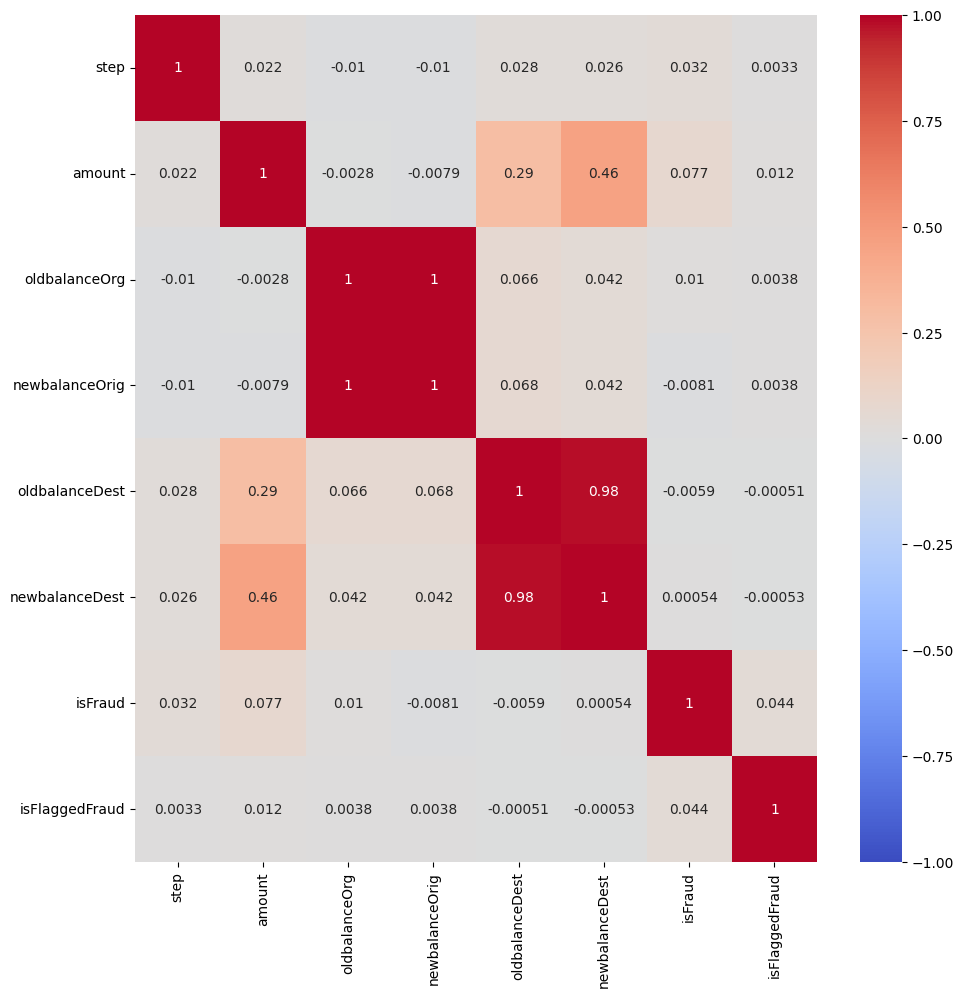

In [25]:
# Heatmap으로 상관관계 분석 - 기존 변수로는 그다지 눈에 띄는 사기거래와의 상관관계가 없었음
sns.heatmap(df.corr(), vmax = 1, vmin = -1, annot = True, cmap = 'coolwarm')
plt.gcf().set_size_inches(11, 11)

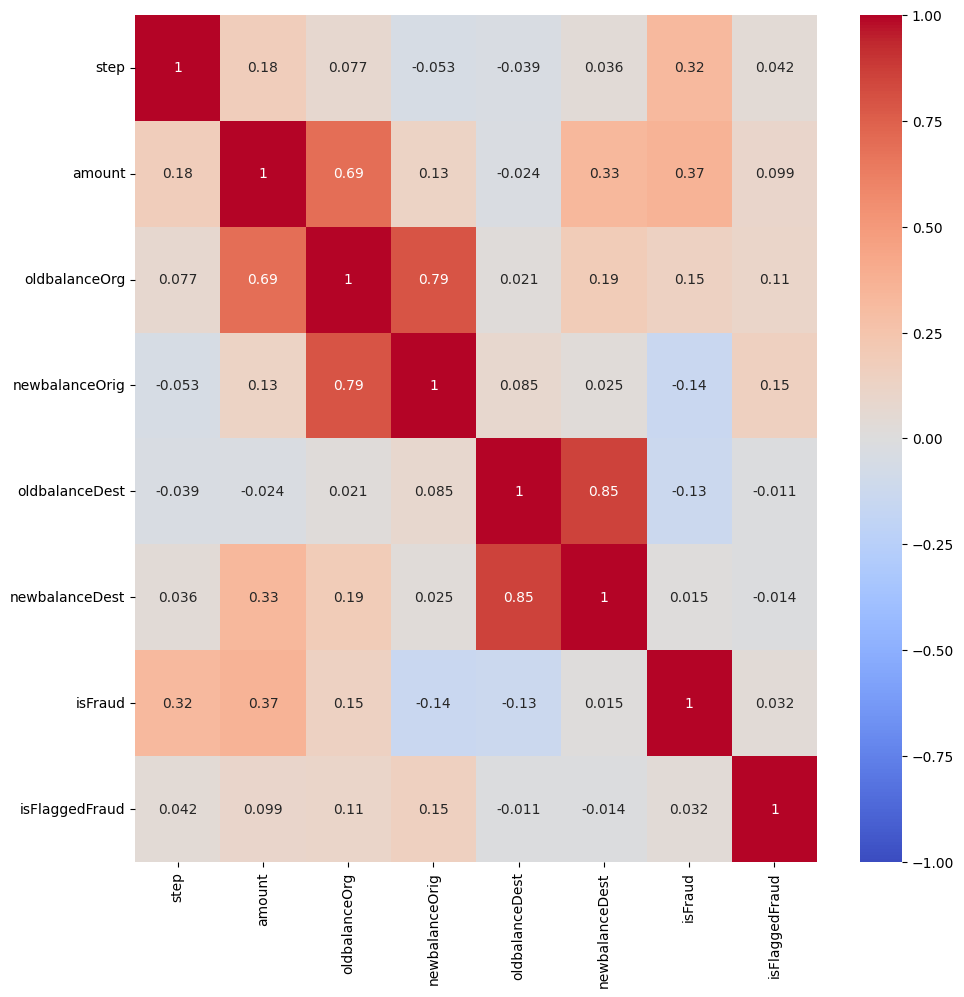

In [26]:
# 샘플을 통한 상관관계 분석 (사기거래 1000개, 정상거래 1000개를 합하여 상관관계 분석)
samples = pd.concat([fraud_samples, non_fraud_samples])

samples_corr = samples.corr()

sns.heatmap(samples_corr, vmax = 1, vmin = -1, annot = True, cmap = 'coolwarm')
plt.gcf().set_size_inches(11, 11)

In [27]:
# 정상거래 필터링 DF 생성
NormalData = df[df['isFraud'] == 0]

In [28]:
# 사기거래의 object 컬럼 값들 : Type은 종속형 변수지만 nameOrig, nameDest은 고객번호로 식별자임
FraudData = df[df['isFraud'] == 1]

cate_cols = []
for column in FraudData.columns:
  if df[column].dtype == object:
    cate_cols.append(column)
    print(f'{column} : {FraudData[column].unique()}')

type : ['TRANSFER' 'CASH_OUT']
nameOrig : ['C1305486145' 'C840083671' 'C1420196421' ... 'C1162922333' 'C1685995037'
 'C1280323807']
nameDest : ['C553264065' 'C38997010' 'C972765878' ... 'C1365125890' 'C2080388513'
 'C873221189']


In [29]:
# 정상거래 type의 unique 값 출력
NormalData['type'].unique()

array(['PAYMENT', 'DEBIT', 'CASH_OUT', 'TRANSFER', 'CASH_IN'],
      dtype=object)

데이터 확인 결과
* PAYMENT : 지불(Orig 잔액은 감소, Dest((M으로 시작) 잔액 0에서 변동없음)
* TRANSFER : 이체(Orig 잔액감소, Dest 잔액 증가)
* CASH_IN : 입금(Orig 잔액 증가, Dest 잔액 감소)
* CASH_OUT : 출금(Orig 잔액감소, Dest 잔액 증가)


In [30]:
# 위의 코드 실행 결과 사기거래는 type이 'TRANSFER', 'CASH_OUT'에서만 발생한다는 걸 알 수 있음
# type이 'TRANSFER'인 사기거래 데이터의 갯수 : 4097개
print(FraudData[FraudData['type'] == 'TRANSFER'].shape[0])

# type이 'CASH_OUT'인 사기거래 데이터의 갯수 : 4116개
print(FraudData[FraudData['type'] == 'CASH_OUT'].shape[0])

4097
4116


In [31]:
# 사기 거래 계좌는 적발되면 정지되니 사기 계죄는 1회성으로 이용될 가능성이 높고 받는 사람 거래 잔액이 적은 편일 것임(가설 1)
# 받는 사람 거래 잔액 : oldbalanceDest, newbalanceDest
# 실제로 사기 거래 데이터의 거래 전 잔액은 중위값까지 0이었음
print(NormalData['oldbalanceDest'].describe())
print('-' * 30)
print(NormalData['newbalanceDest'].describe())
print('=' * 30)
print(FraudData['oldbalanceDest'].describe())
print('-' * 30)
print(FraudData['newbalanceDest'].describe())

count    6.354407e+06
mean     1.101421e+06
std      3.399202e+06
min      0.000000e+00
25%      0.000000e+00
50%      1.333118e+05
75%      9.441446e+05
max      3.560159e+08
Name: oldbalanceDest, dtype: float64
------------------------------
count    6.354407e+06
mean     1.224926e+06
std      3.673816e+06
min      0.000000e+00
25%      0.000000e+00
50%      2.148817e+05
75%      1.111975e+06
max      3.561793e+08
Name: newbalanceDest, dtype: float64
count    8.213000e+03
mean     5.442496e+05
std      3.336421e+06
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      1.478287e+05
max      2.362305e+08
Name: oldbalanceDest, dtype: float64
------------------------------
count    8.213000e+03
mean     1.279708e+06
std      3.908817e+06
min      0.000000e+00
25%      0.000000e+00
50%      4.676420e+03
75%      1.058725e+06
max      2.367265e+08
Name: newbalanceDest, dtype: float64


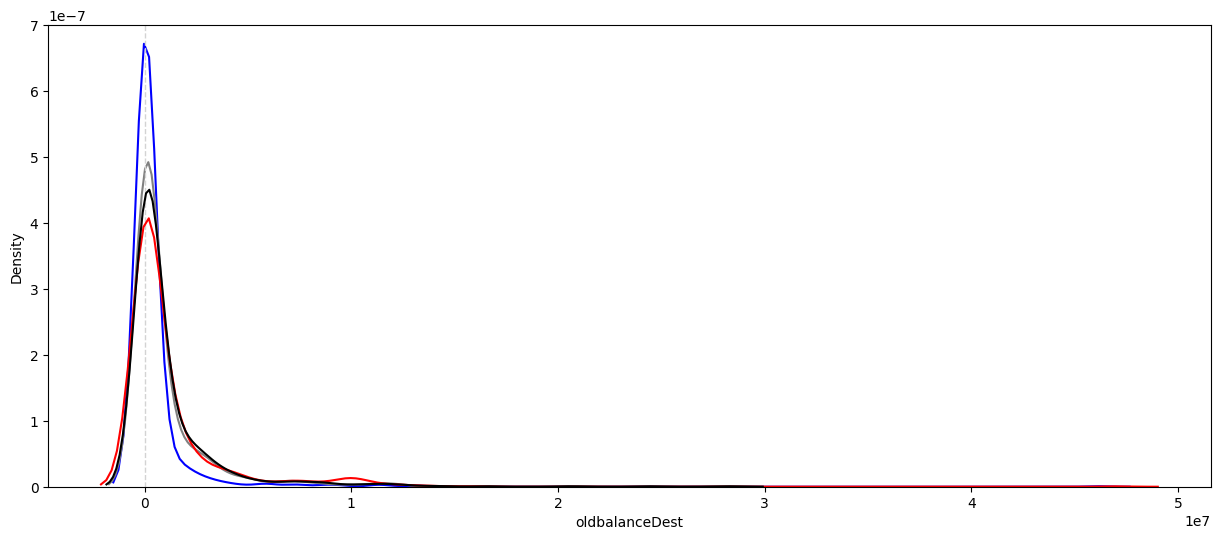

In [32]:
# 수취인 거래전 잔액 / 거래 후 잔액 데이터 시각화(사기거래 그래프는 빨간색으로 표시)
# 데이터 크기 차이가 크기 때문에 이전에 사용했던 샘플 사기거래/정상거래 데이터를 사용해서 시각화

# 거래 전 잔액
sns.kdeplot(data = fraud_samples['oldbalanceDest'], color = 'blue')
sns.kdeplot(data = non_fraud_samples['oldbalanceDest'], color = 'grey')
plt.axvline(0, color = 'lightgrey', linewidth = 1, linestyle = '--')

# 거래 후 잔액
sns.kdeplot(data = fraud_samples['newbalanceDest'], color = 'red')
sns.kdeplot(data = non_fraud_samples['newbalanceDest'], color = 'black')
# plt.axvline(0, color = 'lightgrey', linewidth = 1, linestyle = '--')

plt.ylim([0, 7e-7])
plt.gcf().set_size_inches(15, 6)
plt.show()

# 의문점 1
> 사기 거래는 'TRANSFER'(계좌이체), 'CASH_OUT'(현금출금)으로만 이루어져 있는데 받는 사람 거래 후 잔액이 0원임

In [33]:
# 받는 사람 잔액이 0원인 거래 : 489개
fraud_ZerobalanceDest = fraud_samples[fraud_samples['newbalanceDest'] == 0]

fraud_ZerobalanceDest

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
6266285,615,TRANSFER,56510.50,C956959892,56510.50,0.00,C582952352,0.0,0.0,1,0
6358608,714,TRANSFER,10000000.00,C131412689,10390763.24,390763.24,C1846567377,0.0,0.0,1,0
4472587,324,TRANSFER,21580.37,C765450059,21580.37,0.00,C125935569,0.0,0.0,1,0
6055691,499,TRANSFER,488243.65,C2117568077,488243.65,0.00,C1238599279,0.0,0.0,1,0
1877737,164,TRANSFER,177680.54,C485323920,177680.54,0.00,C1780714769,0.0,0.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
5616079,395,TRANSFER,134297.68,C1196367936,134297.68,0.00,C1052561148,0.0,0.0,1,0
4374260,311,TRANSFER,8589704.49,C1961162790,8589704.49,0.00,C111676219,0.0,0.0,1,0
6352862,705,TRANSFER,353090.95,C1206624869,353090.95,0.00,C1470734212,0.0,0.0,1,0
2986112,231,TRANSFER,400758.85,C1881462722,400758.85,0.00,C418637698,0.0,0.0,1,0


In [34]:
# nameDest이 'C582952352'인 거래는 계좌이체 거래로 amount가 339682.13인데도 잔액이 0원임
# 이체 후 즉시 현금인출을 했다면 0원일 수도 있다고 판단, name이 같은 거래가 더 있는지 확인(없었음)

print(df[df['nameDest'] == 'C582952352'].shape[0]) # 받는 사람이 C582952352
print(df[df['nameOrig'] == 'C582952352'].shape[0]) # 거래를 하는 사람이 C582952352

1
0


In [35]:
# 정상 거래 중 type이 'TRANSFER', 'CASH_OUT' 거래에서도 newbalanceDest == 0 인 거래가 있는지 확인 : 4개
transfer_cashout_non_fraud = non_fraud_samples[non_fraud_samples['type'].isin(['TRANSFER', 'CASH_OUT'])]

transfer_cashout_non_fraud[transfer_cashout_non_fraud['newbalanceDest'] == 0]

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
3734484,278,CASH_OUT,3167.66,C1593272099,62536.0,59368.34,C1641185696,0.0,0.0,0,0
704663,37,CASH_OUT,112562.54,C1407934575,30133.0,0.00,C1243859034,0.0,0.0,0,0
483911,19,TRANSFER,500698.98,C966800981,316628.0,0.00,C133879537,19859.0,0.0,0,0
2835059,226,CASH_OUT,132151.77,C2041609065,0.0,0.00,C811013211,236626.0,0.0,0,0


# 의문점 2.
> 사기 거래의 경우 newbalanceDest이 0인 거래 중 oldbalanceDest이 0인 거래도 많이 보임

In [36]:
# 이전에 확인했듯이 newbalanceDest이 0인 거래는 489개
# oldbalanceDest, newbalanceDest 둘 다 0인 거래는 몇개인지 도출 : 487개
fraud_samples[(fraud_samples['oldbalanceDest'] == 0) & (fraud_samples['newbalanceDest'] == 0)]

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
6266285,615,TRANSFER,56510.50,C956959892,56510.50,0.00,C582952352,0.0,0.0,1,0
6358608,714,TRANSFER,10000000.00,C131412689,10390763.24,390763.24,C1846567377,0.0,0.0,1,0
4472587,324,TRANSFER,21580.37,C765450059,21580.37,0.00,C125935569,0.0,0.0,1,0
6055691,499,TRANSFER,488243.65,C2117568077,488243.65,0.00,C1238599279,0.0,0.0,1,0
1877737,164,TRANSFER,177680.54,C485323920,177680.54,0.00,C1780714769,0.0,0.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
5616079,395,TRANSFER,134297.68,C1196367936,134297.68,0.00,C1052561148,0.0,0.0,1,0
4374260,311,TRANSFER,8589704.49,C1961162790,8589704.49,0.00,C111676219,0.0,0.0,1,0
6352862,705,TRANSFER,353090.95,C1206624869,353090.95,0.00,C1470734212,0.0,0.0,1,0
2986112,231,TRANSFER,400758.85,C1881462722,400758.85,0.00,C418637698,0.0,0.0,1,0


즉, Type이 CASH_IN이거나 PAYMENT인 거래에서 Dest 잔액이 0인 것은 있을 수 있으나,

TRANSFER / CASH_OUT 인 거래에서 Dest 잔액이 0인 것은 의심스러운 거래라고 볼 수 있음

In [37]:
# Type이 TRANSFER, CASH_OUT인 정상거래 1000개 샘플링
non_fraud_samples_out = df[(df['isFraud'] == 0) & (df['type'].isin(['TRANSFER', 'CASH_OUT']))].sample(n = 1000, random_state = 42)

non_fraud_samples_out

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
4306470,307,CASH_OUT,151528.23,C1769639775,0.00,0.00,C931080505,153444.39,304972.62,0,0
2725526,211,CASH_OUT,67763.76,C532167824,195370.00,127606.24,C637044411,1218065.28,1285829.04,0,0
104572,10,TRANSFER,747529.61,C1413119496,599937.71,0.00,C1046448107,213813.89,993585.63,0,0
878078,42,CASH_OUT,215584.67,C141939074,65181.00,0.00,C1906645133,298431.86,514016.53,0,0
4722625,332,CASH_OUT,202423.36,C185963212,0.00,0.00,C518868034,1457793.81,1660217.17,0,0
...,...,...,...,...,...,...,...,...,...,...,...
2840413,226,CASH_OUT,148076.62,C172613235,75029.00,0.00,C444068845,4242153.72,4390230.34,0,0
6140438,544,CASH_OUT,136855.62,C868384714,0.00,0.00,C110207329,487383.17,624238.79,0,0
1313742,136,CASH_OUT,273015.55,C1695498371,10694.00,0.00,C1718253157,704652.27,977667.81,0,0
2551373,206,CASH_OUT,171.76,C4555803,202694.00,202522.24,C81986188,101365.28,101537.04,0,0


In [38]:
# newbalanceDest - oldbalanceDest열 추가 (정상 거래면 +이 되고, 이상 거래면 0이 될 것)
fraud_samples['Dest_error'] = fraud_samples['newbalanceDest'] - fraud_samples['oldbalanceDest']
non_fraud_samples_out['Dest_error'] = non_fraud_samples_out['newbalanceDest'] - non_fraud_samples_out['oldbalanceDest']

<Axes: >

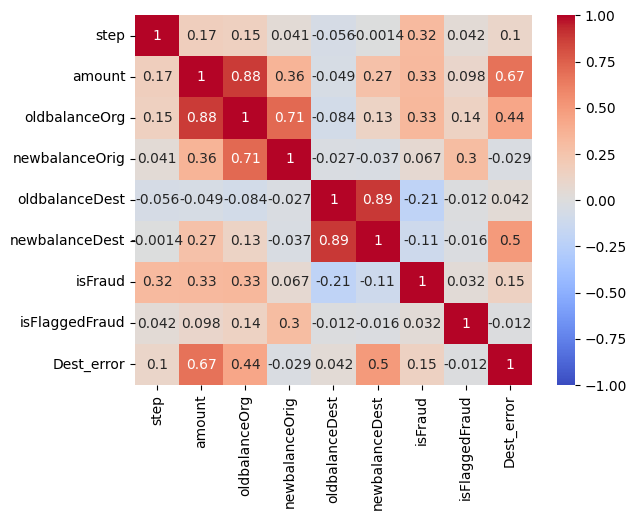

In [39]:
# 두 샘플 데이터를 합쳐서 다시 상관관계 분석
samples_out = pd.concat([fraud_samples, non_fraud_samples_out])

# 상관관계 히트맵
sns.heatmap(data = samples_out.corr(),vmax = 1, vmin = -1, annot = True, cmap = 'coolwarm')

In [40]:
# 예상보다 상관계수가 높지 않게 나와서 Column의 범위를 좀 더 확장
# newbalanceDest - oldbalanceDest - amount 열 추가 (정상 거래면 0이 되고, 이상 거래면 -이 될 것)
fraud_samples['Dest_error2'] = fraud_samples['newbalanceDest'] - fraud_samples['oldbalanceDest'] - fraud_samples['amount']
non_fraud_samples_out['Dest_error2'] = non_fraud_samples_out['newbalanceDest'] - non_fraud_samples_out['oldbalanceDest'] - non_fraud_samples_out['amount']

<Axes: >

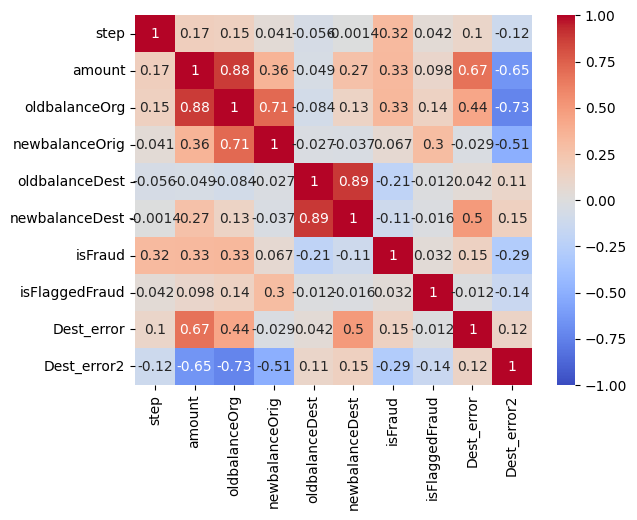

In [41]:
# 두 샘플 데이터를 합쳐서 다시 상관관계 분석
samples_out = pd.concat([fraud_samples, non_fraud_samples_out])

# 상관관계 히트맵
sns.heatmap(data = samples_out.corr(),vmax = 1, vmin = -1, annot = True, cmap = 'coolwarm')

## 결론
* 사기거래일수록 Amount가 높은 거래건이 많았습니다.
* 이상 거래와 사기거래의 상관계수가 -0.29로 비교적 높은 수치를 보입니다.